In [1]:
%matplotlib inline
import numpy as np
from collections import defaultdict
import sys
import pandas as pd
import networkx as nx
import random
import matplotlib.pyplot as plt
import pickle
from nltk.tokenize import MWETokenizer
from scipy import stats
from collections import Counter
import json
import csv
import statsmodels.api as sm

def flushPrint(www):
    sys.stdout.write('\r')
    sys.stdout.write('%s' % www)
    sys.stdout.flush()

In [2]:
df = pd.read_csv('C:/Users/natha/Downloads/life_expectancy.csv')
df

,Country,Sum of Females Life Expectancy,Sum_of_Life_Expectancy_both_sexes,Sum of Males Life Expectancy
0,Chad,57.19,55.24,53.36
1,Nigeria,54.94,54.64,54.33
2,South Sudan,60.75,57.74,54.76
3,Lesotho,60.44,57.80,55.03
4,Central African Republic,59.56,57.67,55.51
...,...,...,...,...
194,Norway,84.97,83.46,81.94
195,Switzerland,85.95,84.09,82.17
196,United Arab Emirates,84.32,83.07,82.17
197,Australia,85.85,84.07,82.28


In [3]:
country_column = 'Country'
life_expectancy_column = 'Sum_of_Life_Expectancy_both_sexes'

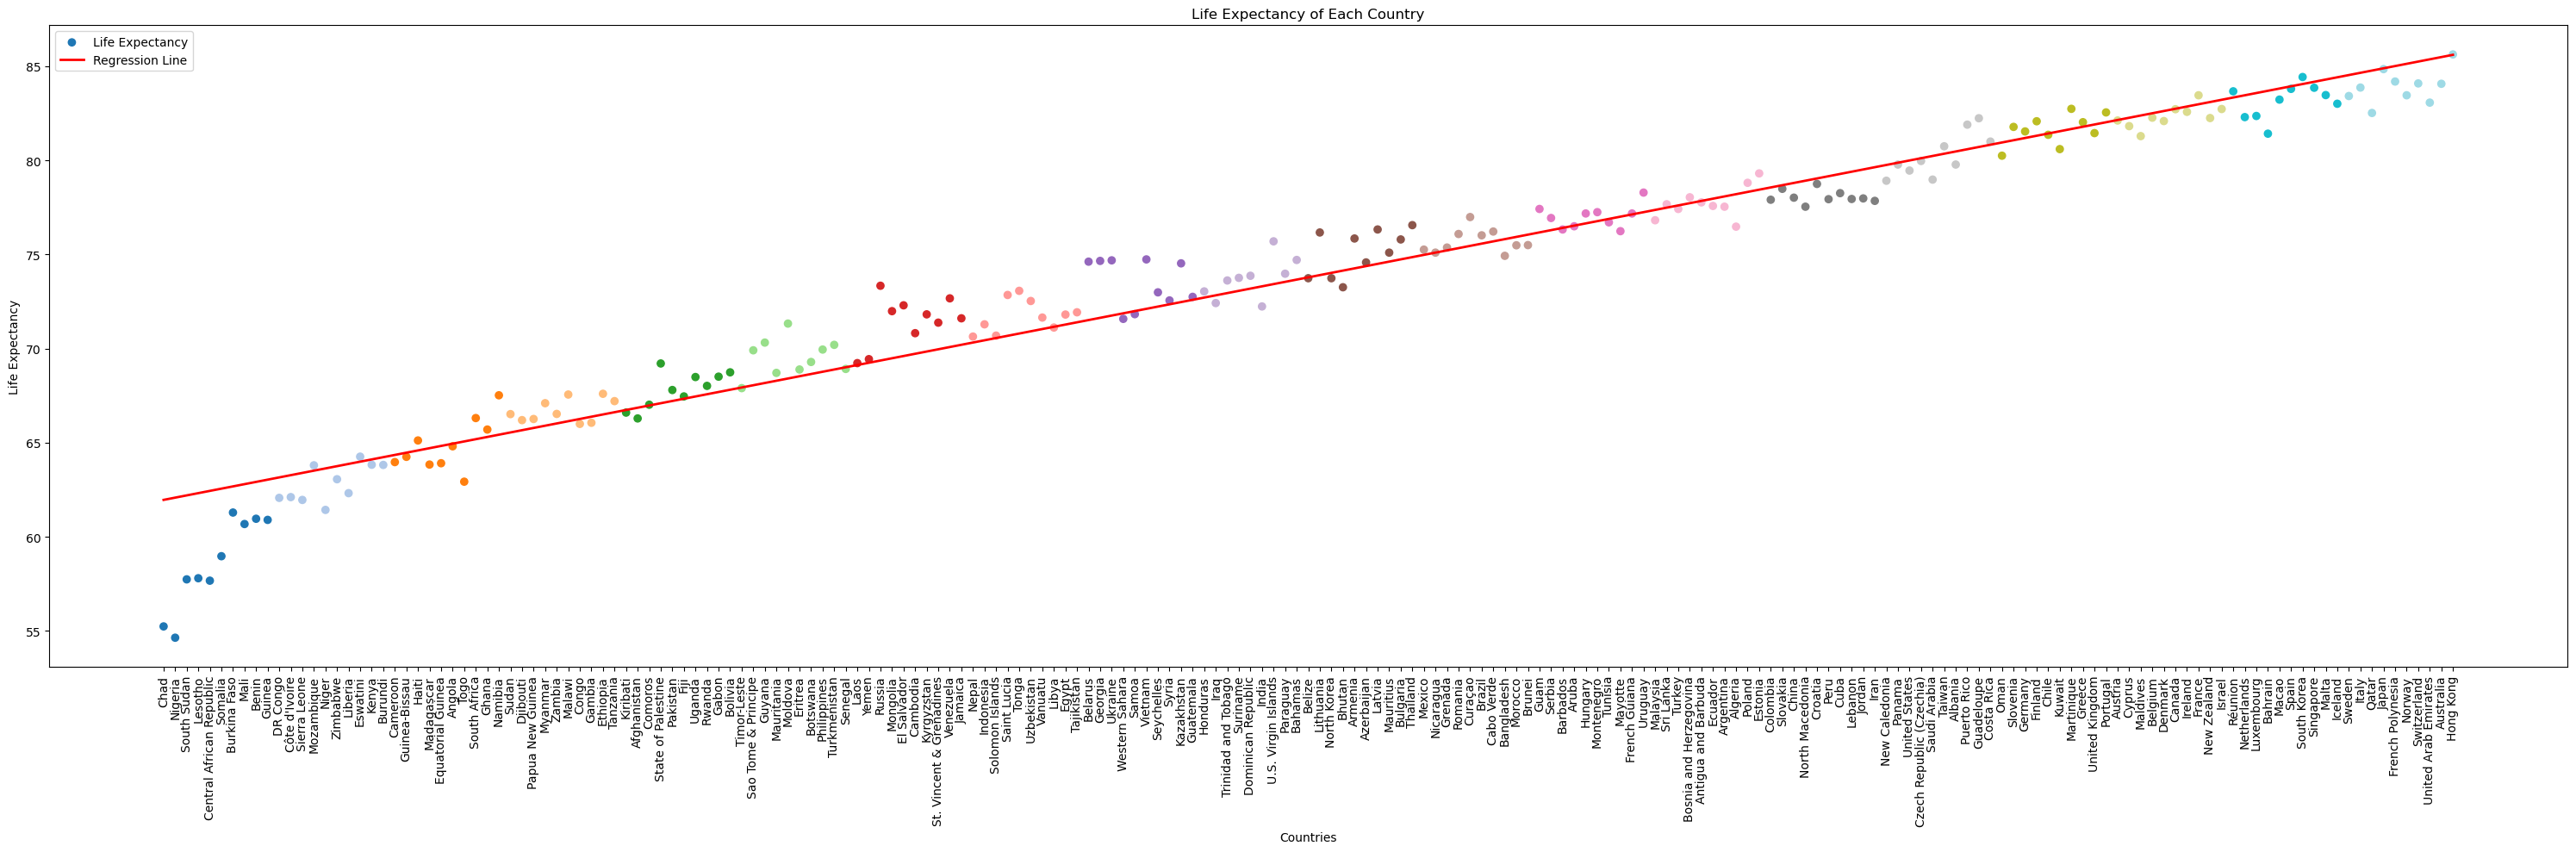

In [4]:
colors = plt.cm.tab20(np.linspace(0, 1, len(df)))

plt.figure(figsize=(30, 10))
plt.scatter(df[country_column], df[life_expectancy_column], label='Life Expectancy', c=colors)

x = np.arange(len(df))
y = df[life_expectancy_column].values

slope, intercept = np.polyfit(x, y, 1)
regression_line = slope * x + intercept

plt.plot(x, regression_line, color='red', label='Regression Line', linewidth=2)
plt.xticks(np.arange(len(df)), df[country_column], rotation=90, fontsize=10)
plt.xlabel('Countries')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy of Each Country')
plt.legend()
plt.tight_layout()
plt.show()

In [5]:
df2 = pd.read_csv(r'C:\Users\natha\OneDrive\Documents\archive\Cost_of_living_2020.csv')
df2

,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,Switzerland,122.40,50.25,87.89,120.27,123.01,119.53
1,Norway,101.43,36.15,70.21,91.14,109.28,88.38
2,Iceland,100.48,46.95,74.88,86.89,113.74,79.44
3,Japan,83.35,25.97,55.90,81.82,48.95,87.28
4,Denmark,83.00,31.92,58.57,61.74,100.75,100.88
...,...,...,...,...,...,...,...
127,Uzbekistan,26.01,7.54,17.18,21.59,20.17,24.31
128,Syria,25.31,5.68,15.92,22.42,21.38,11.46
129,India,24.58,5.68,15.54,24.55,17.17,54.30
130,Afghanistan,24.24,4.03,14.58,17.70,17.38,28.20


In [6]:
country_column2 = 'Country'
cost_column = 'Cost of Living Index'

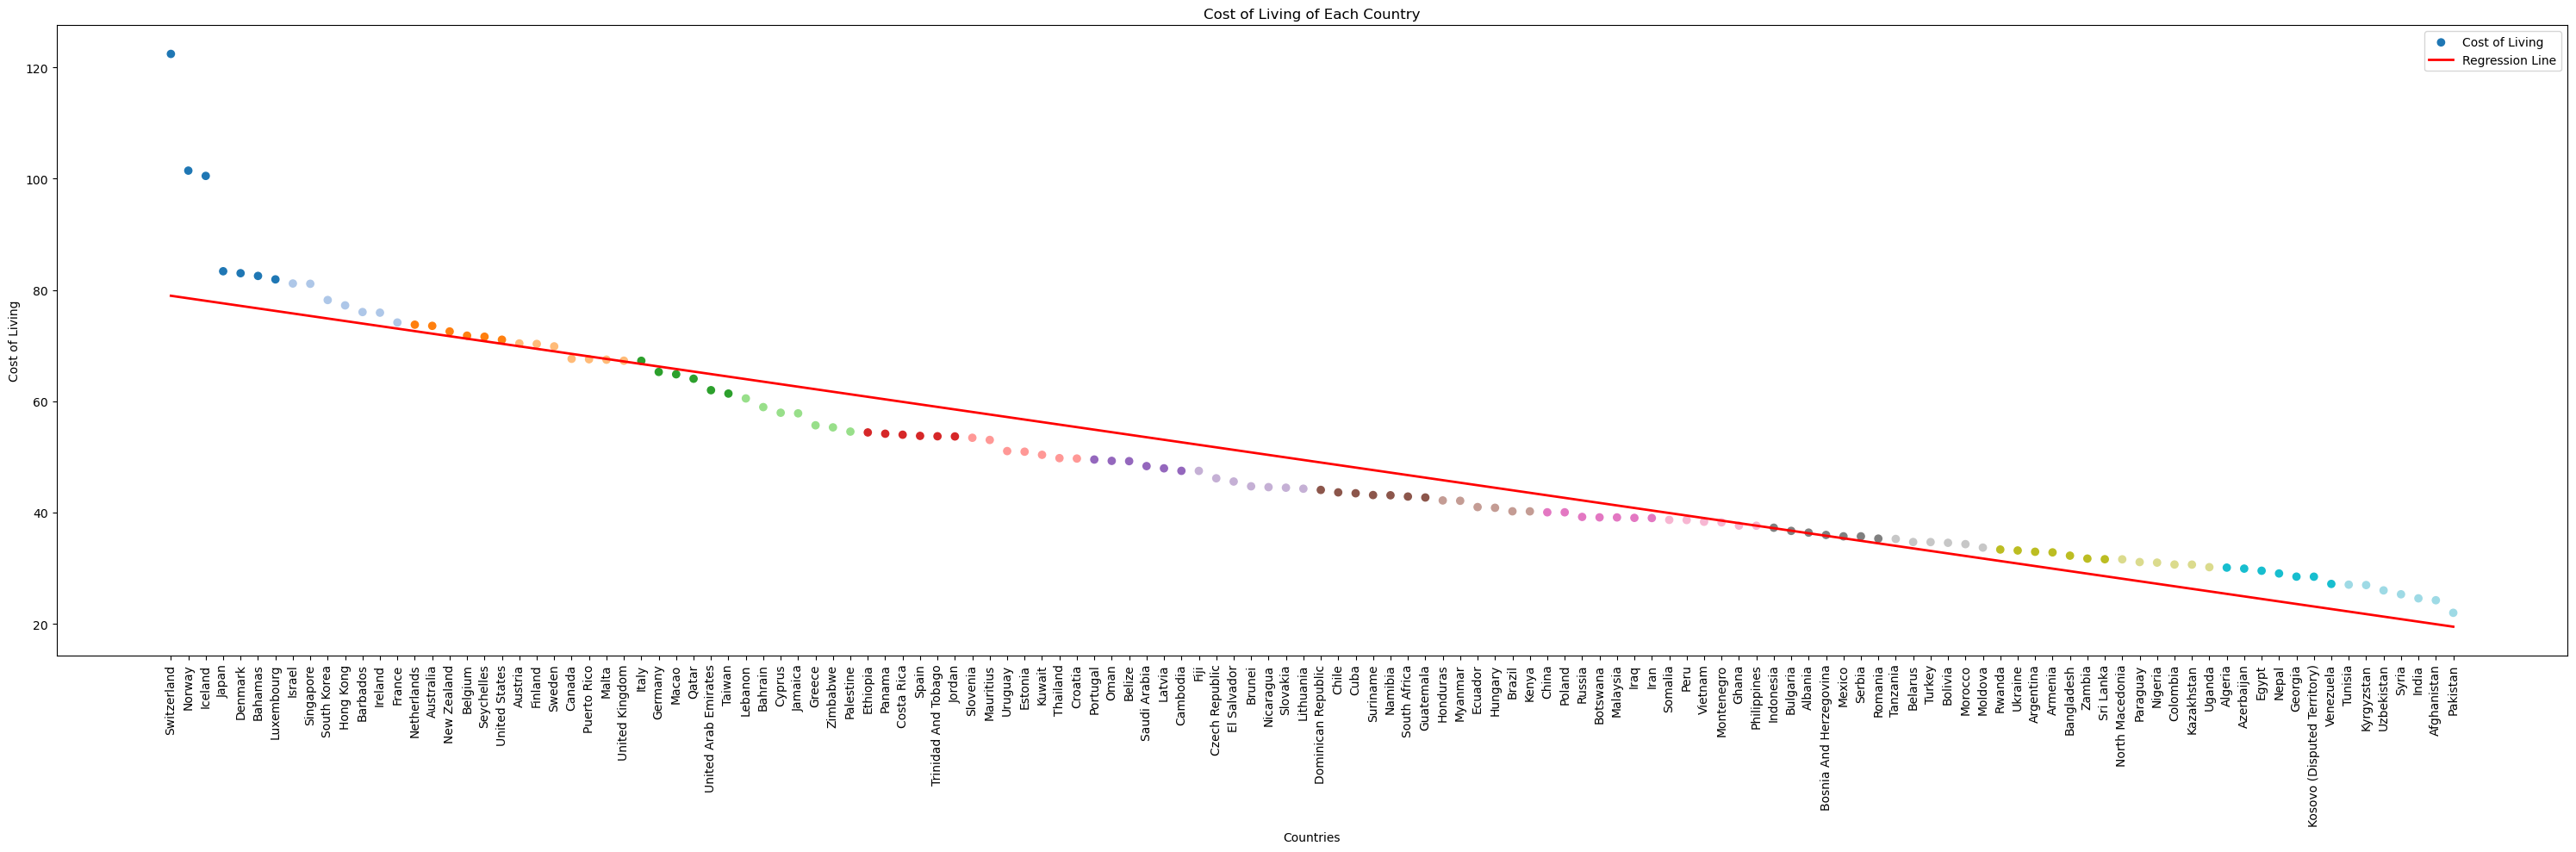

In [7]:
colors = plt.cm.tab20(np.linspace(0, 1, len(df2)))

plt.figure(figsize=(30, 10))
plt.scatter(df2[country_column2], df2[cost_column], label='Cost of Living', c=colors)

x = np.arange(len(df2))
y = df2[cost_column].values

slope, intercept = np.polyfit(x, y, 1)
regression_line = slope * x + intercept

plt.plot(x, regression_line, color='red', label='Regression Line', linewidth=2)
plt.xticks(np.arange(len(df2)), df2[country_column2], rotation=90, fontsize=10)
plt.xlabel('Countries')
plt.ylabel('Cost of Living')
plt.title('Cost of Living of Each Country')
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
df4 = pd.read_csv(r'C:\Users\natha\OneDrive\Documents\archive\Quality_of_life_index_by_countries_2020.csv')
df4

,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
0,Denmark,192.67,100.88,74.90,80.00,83.00,7.45,28.85,21.33,81.80
1,Switzerland,192.01,119.53,78.40,72.44,122.40,8.68,29.09,22.39,79.24
2,Finland,190.22,99.93,76.68,75.79,70.29,8.35,29.90,11.55,58.87
3,Australia,186.21,107.31,58.64,77.38,73.54,7.52,34.73,23.46,92.70
4,Netherlands,183.67,90.73,72.38,74.65,73.75,7.51,29.43,27.41,87.61
...,...,...,...,...,...,...,...,...,...,...
75,Sri Lanka,85.16,24.45,59.78,72.53,31.61,31.14,59.01,59.14,59.11
76,Iran,74.14,22.69,50.75,51.70,39.01,25.11,48.01,77.45,70.99
77,Kenya,70.56,27.32,38.34,55.59,40.21,31.63,56.65,76.60,99.79
78,Bangladesh,70.03,33.21,36.06,42.80,32.25,13.10,56.73,86.21,71.29


In [9]:
country_column4 = 'Country'
quality_column = 'Quality of Life Index'

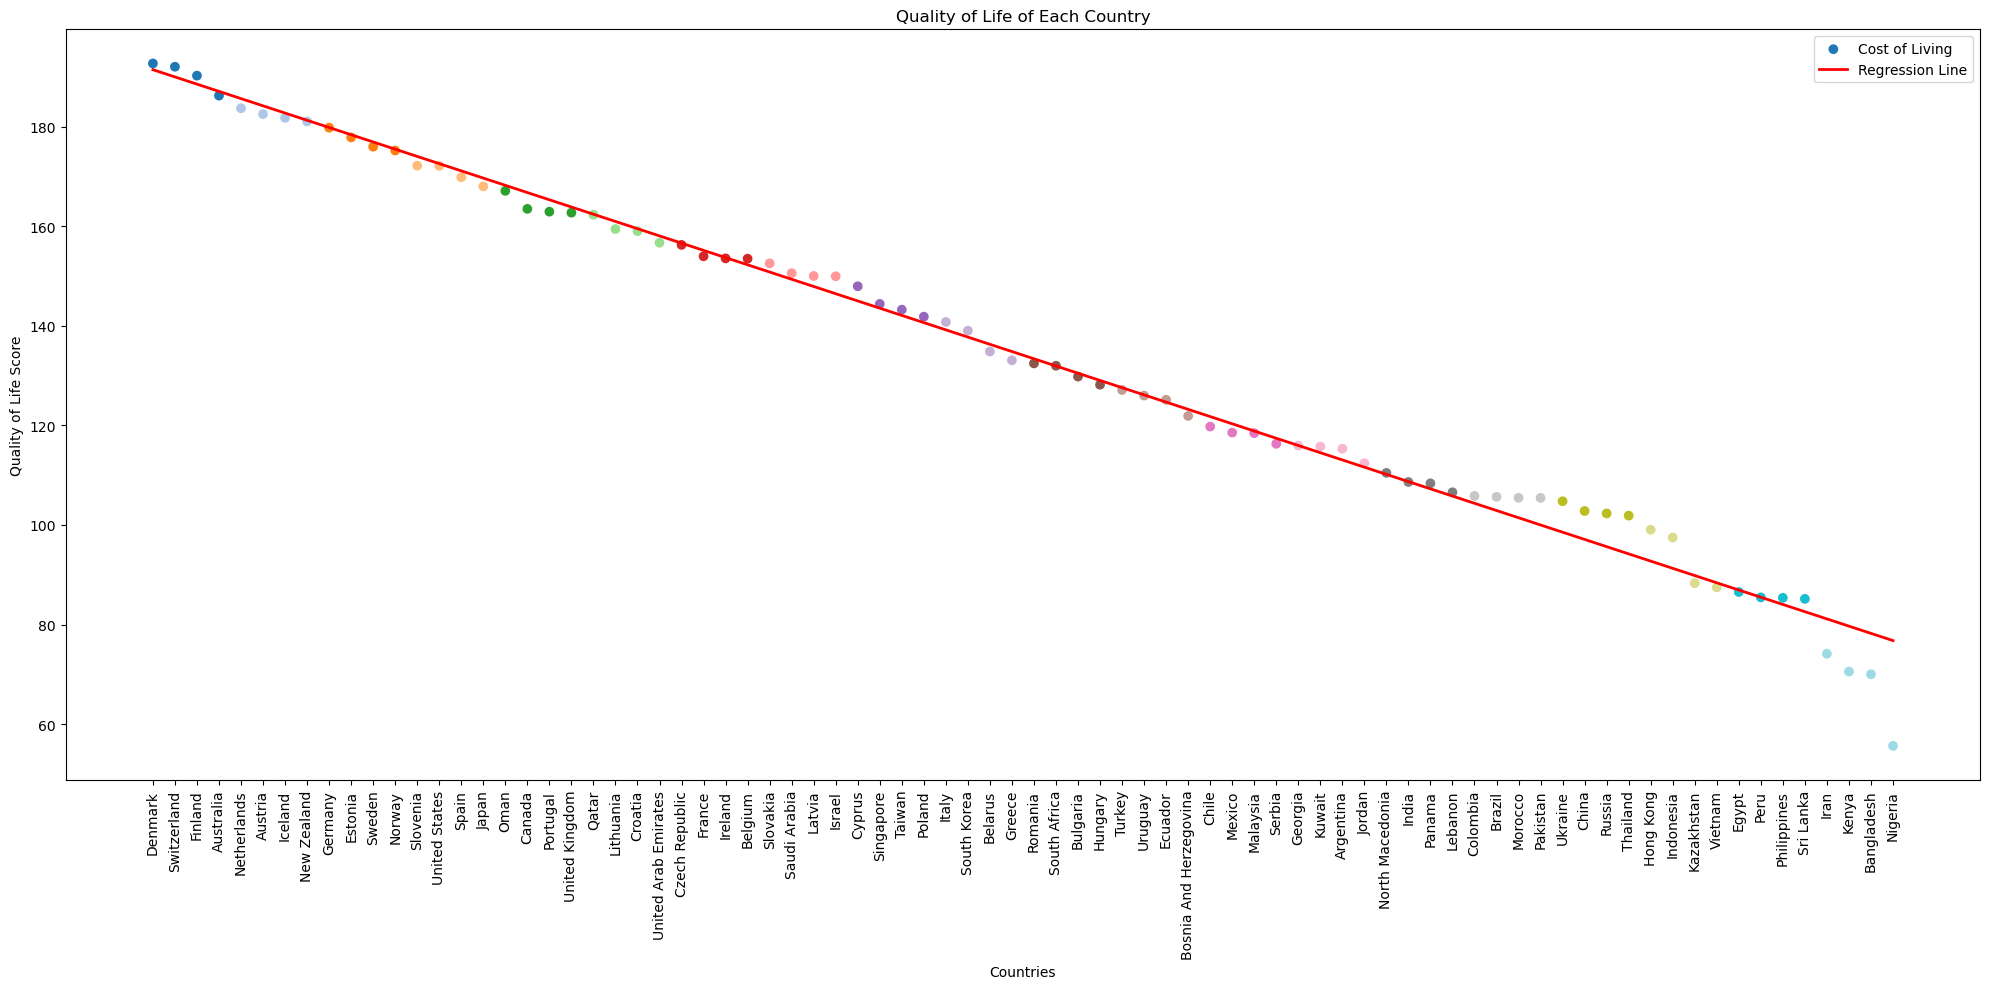

In [10]:
colors = plt.cm.tab20(np.linspace(0, 1, len(df4)))

plt.figure(figsize=(20, 10))
plt.scatter(df4[country_column4], df4[quality_column], label='Cost of Living', c=colors)

df4[quality_column] = pd.to_numeric(df4[quality_column], errors='coerce')
df4 = df4.dropna(subset=[quality_column])

x = np.arange(len(df4))
y = df4[quality_column].values

slope, intercept = np.polyfit(x, y, 1)
regression_line = slope * x + intercept

plt.plot(x, regression_line, color='red', label='Regression Line', linewidth=2)
plt.xticks(np.arange(len(df4)), df4[country_column4].astype(str), rotation=90, fontsize=10)
plt.xlabel('Countries')
plt.ylabel('Quality of Life Score')
plt.title('Quality of Life of Each Country')
plt.legend()
plt.tight_layout()
plt.show()